# Generator of lead-lag signatures of market data

In [1]:
import base

import matplotlib.pyplot as plt

## Data

### Load data

The data consists of 1 second paths of bid and ask market data for Apple on the 5th of April of 2019.

In [2]:
import pickle

raw_corpus = pickle.load(open("../data/market.dat", "rb"))

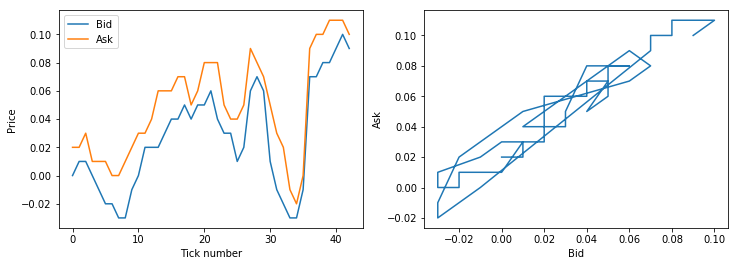

In [3]:
sample = raw_corpus[0]
bid, ask = sample.T

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(bid, label="Bid")
plt.plot(ask, label="Ask")

plt.ylabel("Price")
plt.xlabel("Tick number")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(bid, ask)

plt.xlabel("Bid")
plt.ylabel("Ask")
plt.show()

### Transform to leadlag paths

In [4]:
from utils.leadlag import leadlag

corpus = [leadlag(p) for p in raw_corpus]

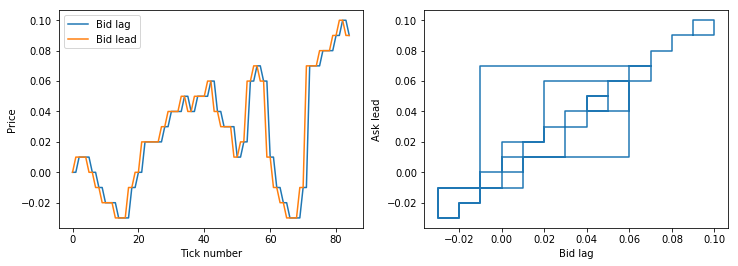

In [5]:
sample = corpus[0]
bid_lag, ask_lag, bid_lead, ask_lead = sample.T

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(bid_lag, label="Bid lag")
plt.plot(bid_lead, label="Bid lead")

plt.ylabel("Price")
plt.xlabel("Tick number")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(bid_lag, bid_lead)

plt.xlabel("Bid lag")
plt.ylabel("Ask lead")
plt.show()

## Path generator

In [19]:
import importlib
importlib.reload(generator)

<module 'generator' from '../src/generator.py'>

In [20]:
import generator

order = 4
gen = generator.Generator(corpus, order)

### Train generator

In [104]:
gen.train(n_epochs=100000)

## Generate new samples

In [105]:
generated = gen.generate(len(corpus))

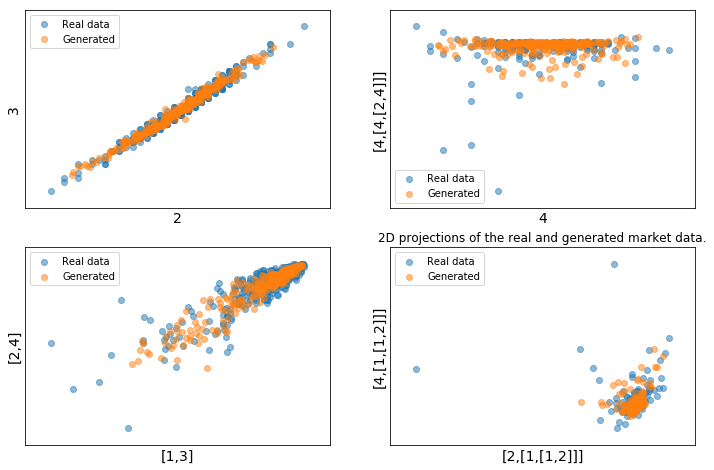

In [106]:
from esig import tosig

keys = tosig.logsigkeys(4, order).split()
projections = [(1, 2), (3, 73), (5, 8), (33, 55)]

plt.figure(figsize=(12, 8))
for i, projection in enumerate(projections):
    j, k = projection
    
    plt.subplot(2, 2, i + 1)

    plt.scatter(gen.logsigs[:, j], gen.logsigs[:, k],
                label="Real data", alpha=0.5)
    plt.scatter(generated[:, j], generated[:, k],
               label="Generated", alpha=0.5)
    
    plt.xlabel(keys[projection[0]], fontsize=14)
    plt.ylabel(keys[projection[1]], fontsize=14)
    plt.xticks([])
    plt.yticks([])
    plt.xlim(min(gen.logsigs[:, j]) - 0.1 * (max(gen.logsigs[:, j]) - min(gen.logsigs[:, j])),
             max(gen.logsigs[:, j]) + 0.1 * (max(gen.logsigs[:, j]) - min(gen.logsigs[:, j])))
    plt.ylim(min(gen.logsigs[:, k]) - 0.1 * (max(gen.logsigs[:, k]) - min(gen.logsigs[:, k])),
             max(gen.logsigs[:, k]) + 0.1 * (max(gen.logsigs[:, k]) - min(gen.logsigs[:, k])))
    plt.legend()
    
    
plt.title("2D projections of the real and generated market data.")
plt.show()